In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
from tqdm.notebook import tqdm
import threading
from multiprocessing import Pool
import itertools

In [2]:
def simulated_annealing(instance_url, T, radius, alpha):
    qap_instance_file = urllib.request.urlopen(instance_url)
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))

    def qap_objective_function(p):
        s = 0.0
        for i in range(n):
            s += (A[i, :] * B[p[i], p]).sum()
        return s

    def random_neighbor(p, radius):
        q = p.copy()
        for r in range(radius):
            i, j = np.random.choice(n, 2, replace=False)
            q[i], q[j] = q[j], q[i]
        return q

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        delta = q_cost - p_cost
        temperature = alpha * (1 - t / T)
        if delta < 0:
            p, p_cost = q, q_cost
        elif np.random.rand() < np.exp(- alpha * delta * t / T):
            p, p_cost = q, q_cost
    return p_cost

In [3]:
instance_url = 'https://qaplib.mgi.polymtl.ca/data.d/nug12.dat'
T = 25000
radius = 1
alpha = 0.5

num_runs = 1000 
args = (instance_url, T, radius, alpha)

tasks = [args] * num_runs

counter = itertools.count()

costs = []

def run_simulated_annealing(instance_url, T, radius, alpha):
    cost = simulated_annealing(instance_url, T, radius, alpha)
    costs.append(cost)
    print("Done " + str(next(counter)))

threads = []

for instance_url, T, radius, alpha in tasks:
    thread = threading.Thread(target=run_simulated_annealing, args=(instance_url, T, radius, alpha))
    
    threads.append(thread)
    
    thread.start()

for thread in threads:
    thread.join()


Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8Done 9

Done 10
Done 11
Done 12
Done 13
Done 14
Done 15
Done 16Done 17

Done 18
Done 19
Done 20Done 21

Done 22
Done 23
Done 24
Done 25
Done 26
Done 27
Done 28
Done 29
Done 30
Done 31
Done 32
Done 33
Done 34Done 35

Done 36
Done 37
Done 38
Done 39
Done 40Done 41

Done 42
Done 43
Done 44
Done 45
Done 46
Done 47
Done 48
Done 49
Done 50
Done 51
Done 52
Done 53
Done 54
Done 55Done 56

Done 57
Done 58
Done 59
Done 60
Done 61
Done 62
Done 63
Done 64
Done 65
Done 66
Done 67
Done 68
Done 69
Done 70
Done 71
Done 72
Done 73Done 74
Done 75

Done 76
Done 77
Done 78
Done 79
Done 80
Done 81
Done 82
Done 83
Done 84
Done 85
Done 86
Done 87
Done 88
Done 89
Done 90
Done 91
Done 92
Done 93
Done 94
Done 95
Done 96
Done 97
Done 98
Done 99
Done 100
Done 101
Done 102
Done 103
Done 104Done 105
Done 106
Done 107

Done 108
Done 109
Done 110
Done 111
Done 112
Done 113
Done 114
Done 115
Done 116
Done 117
Done 118
Done 119
Done 120
Done 121
Done 122
Don

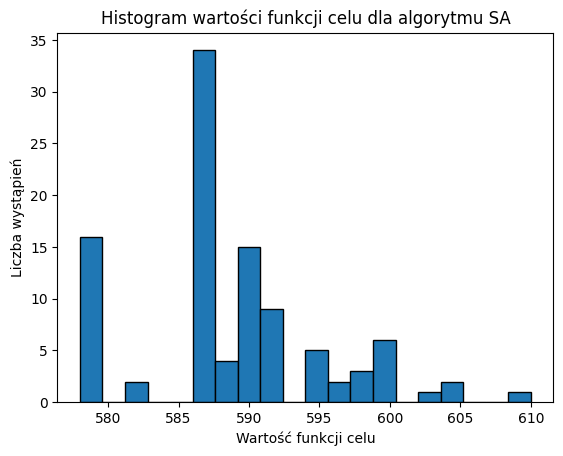

In [4]:
plt.figure()
plt.hist(costs, bins=20, edgecolor='black')
plt.title('Histogram wartości funkcji celu dla algorytmu SA')
plt.xlabel('Wartość funkcji celu')
plt.ylabel('Liczba wystąpień')
plt.show() #dla 100 

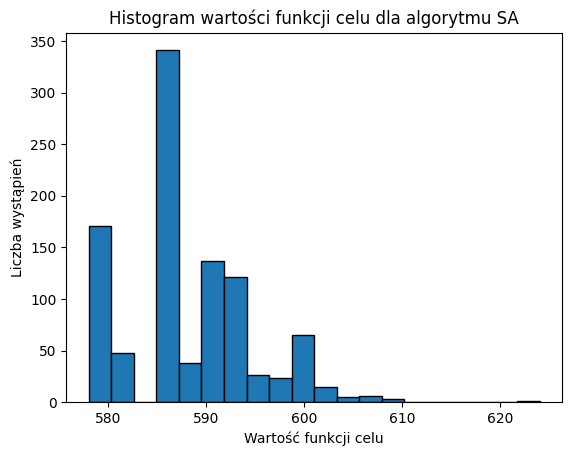

: 

In [4]:
plt.figure()
plt.hist(costs, bins=20, edgecolor='black')
plt.title('Histogram wartości funkcji celu dla algorytmu SA')
plt.xlabel('Wartość funkcji celu')
plt.ylabel('Liczba wystąpień')
plt.show() #dla 1000